<h1 align="center">Markov Chain Monte Carlo for fun and profit</h1>
<h1 align="center"> 🎲 ⛓️ 👉 🧪 </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# This loads some custom styles for matplotlib
import json, matplotlib

with open("../_static/matplotlibrc.json") as f:
    matplotlib.rcParams.update(json.load(f))

np.random.seed(
    42
)  # This makes our random numbers reproducible when the notebook is rerun in order

# Producing Research Outputs

So now that we have the ability to simulate our system let's do a little exploration. First let's take three temperatures at each we'll do `10` runs and see how the systems evolve. I'll also tack on a little histogram at the right-hand side of where the systems spent their time.

In [2]:
from MCFF.mcmc import mcmc_generator

### The measurement we will make ###
def average_color(state):
    return np.mean(state)


### Simulation Inputs ###
N = 20  # Use an NxN system
Ts = [10, 4.5, 3]  # What temperatures to use
steps = 200  # How many times to sample the state
stepsize = N**2  # How many individual monte carlo flips to do in between each sample
N_repeats = 10  # How many times to repeat each run at fixed temperature
initial_state = np.ones(shape=(N, N))  # the initial state to use
flips = (
    np.arange(steps) * stepsize
)  # Use this to plot the data in terms of individual flip attemps

### Simulation Code ###
average_color_data = np.array(
    [
        [
            [
                average_color(s)
                for s in mcmc_generator(
                    initial_state, steps=steps, stepsize=stepsize, T=T
                )
            ]
            for _ in range(N_repeats)
        ]
        for T in Ts
    ]
)

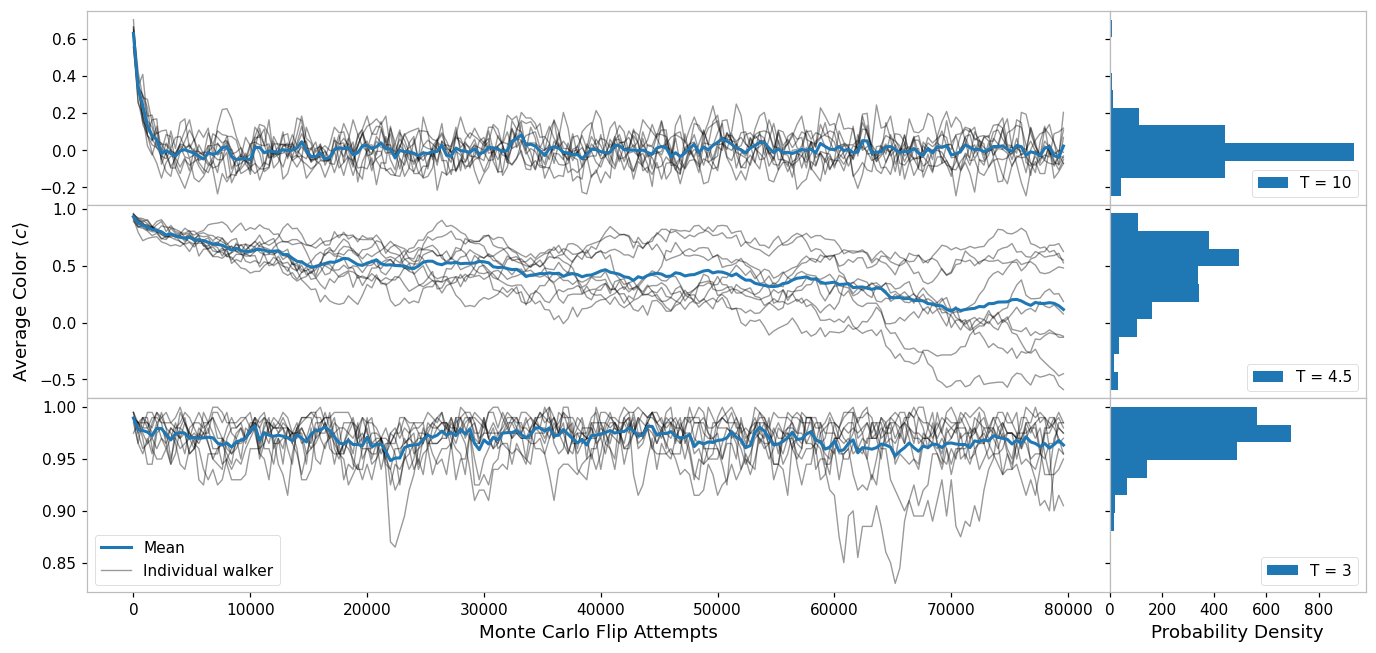

In [3]:
# It's always good to separate you plotting from your data generation
from itertools import count

fig, axes = plt.subplots(
    figsize=(15, 7),
    nrows=3,
    ncols=2,
    sharey="row",
    sharex="col",
    gridspec_kw=dict(hspace=0, wspace=0, width_ratios=(4, 1)),
)

for i, ax, hist_ax in zip(count(), axes[:, 0], axes[:, 1]):
    c = average_color_data[i]
    indiv_line, *_ = ax.plot(flips, c.T, alpha=0.4, color="k", linewidth=0.9)
    (mean_line,) = ax.plot(flips, np.mean(c, axis=0))
    hist_ax.hist(c.flatten(), orientation="horizontal", label=f"T = {Ts[i]}")

axes[-1, 0].set(xlabel=f"Monte Carlo Flip Attempts")
axes[-1, 1].set(xlabel="Probability Density")
axes[1, 0].set(ylabel=r"Average Color $\langle c \rangle$")
axes[-1, 0].legend([mean_line, indiv_line], ["Mean", "Individual walker"])
for ax in axes[:, 1]:
    ax.legend(loc=4)

There are a few key takeaways about MCMC in this plot:

- It takes a while for MCMC to 'settle in', you can see that for T = 10 the natural state is somewhere around c = 0, which takes about 2000 steps to reach from the initial state with c = 1. In general when doing MCMC we want to throw away some values at the beginning because they're too affected by the initial state.
- At High and Low temperatures we basically just get small fluctuations about an average value
- At intermediate temperature the fluctuations occur on much longer time scales! Because the systems can only move a little each timestep, it means that the measurements we are making are *correlated* with themselves at previous times. The result of this is that if we use MCMC to draw N samples, we don't get as much information as if we had drawn samples from an uncorrelated variable (like a die roll for instance).

In [4]:
%load_ext watermark
%watermark -n -u -v -iv -w -g -r -b -a "Thomas Hodson" -gu "T_Hodson"

Author: Thomas Hodson

Github username: T_Hodson

Last updated: Mon Jul 18 2022

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

Git hash: 03657e08835fdf23a808f59baa6c6a9ad684ee55

Git repo: https://github.com/ImperialCollegeLondon/ReCoDE_MCMCFF.git

Git branch: main

json      : 2.0.9
numpy     : 1.21.5
matplotlib: 3.5.1

Watermark: 2.3.1

